In [57]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.plot
importlib.reload(common.plot)

df = pd.read_csv("Data.csv")
df

,yr,inbtou_volume,inbtou_volume_ov,inbtou_volume_sd,inbtou_spending,inbtou_spending_travel,inbtou_spending_transport,covid19_cases,covid19_deaths,covid19_mortality
0,2010,5260000,1370000,3890000,2159000000,2147000000,12000000,0,0,0.000000
1,2011,5590000,1350000,4240000,2157000000,2142000000,15000000,0,0,0.000000
2,2012,5940000,1420000,4520000,2333000000,2311000000,22000000,0,0,0.000000
3,2013,6160000,1370000,4790000,2305000000,2285000000,20000000,0,0,0.000000
4,2014,6320000,1450000,4870000,2336000000,2316000000,20000000,0,0,0.000000
5,2015,6120000,1500000,4620000,2554000000,2537000000,17000000,0,0,0.000000
6,2016,6270000,1500000,4770000,3091000000,3074000000,17000000,0,0,0.000000
7,2017,6130000,1450000,4680000,2951000000,2930000000,21000000,0,0,0.000000
8,2018,6620000,1630000,4990000,3756000000,3728000000,28000000,0,0,0.000000
9,2019,7250000,1810000,5440000,4150000000,4125000000,25000000,0,0,0.000000


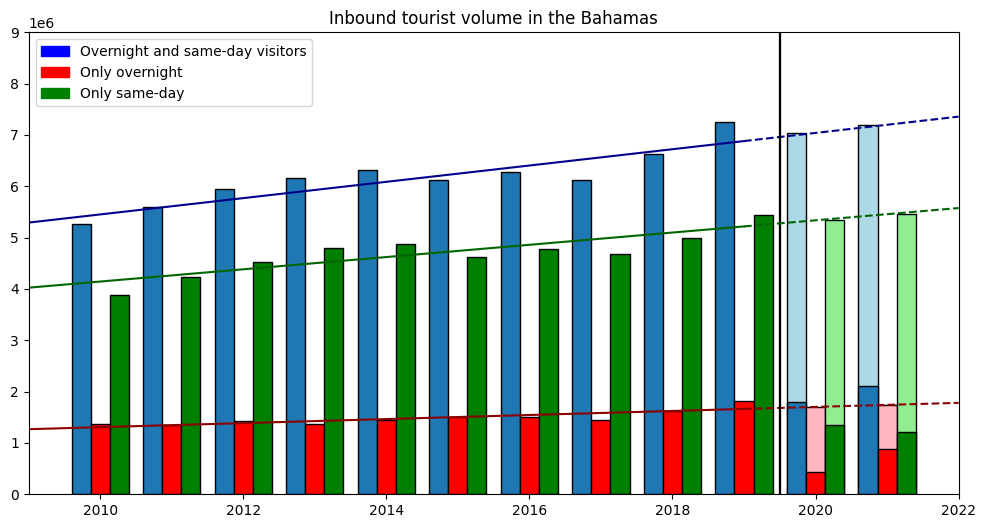

In [58]:
# Set up plot
plt.figure(figsize=(12,6))
plt.title('Inbound tourist volume in the Bahamas')
plt.xlim(2009, 2022)
plt.ylim(0, 9*10**6)

# Generate difference-in-differences plot
common.plot.gen_did_plot(df, 'inbtou_volume',
                         bar_width=0.8/3, bar_offset=-0.8/3)
common.plot.gen_did_plot(df, 'inbtou_volume_ov',
                         bar_width=0.8/3, bar_offset=0,
                         primary_color='red', secondary_color='lightpink', trendline_color='darkred')
common.plot.gen_did_plot(df, 'inbtou_volume_sd',
                         bar_width=0.8/3, bar_offset=0.8/3,
                         primary_color='green', secondary_color='lightgreen', trendline_color='darkgreen')

# Render plot
plt.legend(handles=[
    mpatches.Patch(color='blue', label='Overnight and same-day visitors'),
    mpatches.Patch(color='red', label='Only overnight'),
    mpatches.Patch(color='green', label='Only same-day'),
])
plt.show()